<a href="https://colab.research.google.com/github/EugeneStrakhov86/data-science/blob/master/Trementum_analytics_test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trementum analytics test task: Data Processing

## Step 1. Loading necessary libraries and packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2. Data Loading and Merging

We start with loading CSV files into Pandas DataFrames. The second dataset contains a 'datetime' column so we need `parse_dates` parameter here to handle it correctly.

In [3]:
path = "/content/drive/MyDrive/Data Science/Job application/Trementum test task"
accounts = pd.read_csv(path + "/accounts.csv")
posts = pd.read_csv(path + "/posts.csv", parse_dates=['created_time'])
followers = pd.read_csv(path + "/sources_for_followers.csv")

Let's check a few rows of each dataset.

In [4]:
accounts.head(2)

,id,username,full_name,description,is_verified,restricted,_id,_status,id_alt
0,100063695660293,ukraina.ru,Украина.ру,Информационно-аналитическое издание «Украина.ру»,False,NaN,378,downloaded,NaN
1,144698628932572,tassagency,ТАСС,"Информационное агентство России ""ТАСС"" - Крупн...",True,NaN,364,downloaded,NaN


In [5]:
posts.head(2)

,id,created_time,profile_id,text_original,comments_count
0,2318039031731205,2023-04-24 12:29:35+00:00,100068846905135,Smerenia pleacă din inima ta,0
1,2318026655065776,2023-04-24 12:07:02+00:00,100068846905135,# Sfântul în Arsenie Boca # Nu ignora puneţi o...,22


In [6]:
followers.head(2)

,_id,followers_count
0,378,38000
1,364,761570


It seems everything is OK. Next, we need to merge the data. Here we use `merge` method with the option `how="left"` which is equivalent to SQL LEFT JOIN connection.

For such type of joining, we save all the rows of the left table that makes sense for us since we focus on analysis of profiles. We also need to find foreign keys for merging. Particularly, `posts` table has a foreign key `profile_id` which is related to `id` column of `accounts` table. Then, `followers` table has `_id` column which is foreign key related to `_id` column in `accounts` table.

In [7]:
# Merge accounts and posts
accounts_posts = accounts.merge(posts, how='left', left_on='id', right_on='profile_id')

# Merge the resulting data with followers info
full_data = accounts_posts.merge(followers, how='left', on='_id')

full_data.head(2)

,id_x,username,full_name,description,is_verified,restricted,_id,_status,id_alt,id_y,created_time,profile_id,text_original,comments_count,followers_count
0,100063695660293,ukraina.ru,Украина.ру,Информационно-аналитическое издание «Украина.ру»,False,NaN,378,downloaded,NaN,9.790827e+14,2023-04-23 18:15:18+00:00,1.000637e+14,Adrian Papahagi anunță pe pagina sa de Faceboo...,36.0,38000
1,100063695660293,ukraina.ru,Украина.ру,Информационно-аналитическое издание «Украина.ру»,False,NaN,378,downloaded,NaN,9.783713e+14,2023-04-22 15:37:57+00:00,1.000637e+14,Adrian Papahagi: Există limite în orice. Acest...,2.0,38000


To make data more clean and ready for further analysis we should drop duplicate column `profile_id`, rename some columns and set index of the dataset to `post_id` which is unique for each row.

In [8]:
full_data = full_data.drop('profile_id', axis=1)
full_data = full_data.rename(columns={'id_x': 'profile_id', 'id_y': 'post_id'})
full_data = full_data.set_index('post_id')

full_data.head(2)

,profile_id,username,full_name,description,is_verified,restricted,_id,_status,id_alt,created_time,text_original,comments_count,followers_count
post_id,,,,,,,,,,,,,
9.790827e+14,100063695660293,ukraina.ru,Украина.ру,Информационно-аналитическое издание «Украина.ру»,False,NaN,378,downloaded,NaN,2023-04-23 18:15:18+00:00,Adrian Papahagi anunță pe pagina sa de Faceboo...,36.0,38000
9.783713e+14,100063695660293,ukraina.ru,Украина.ру,Информационно-аналитическое издание «Украина.ру»,False,NaN,378,downloaded,NaN,2023-04-22 15:37:57+00:00,Adrian Papahagi: Există limite în orice. Acest...,2.0,38000


## Step 3. Data Preprocessing

Let's look through resulting dataset and see if we need some more preprocessing before Exploratory Data Analysis.

In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1024 entries, 979082653090770.0 to 2275615322646696.0
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   profile_id       1024 non-null   int64              
 1   username         946 non-null    object             
 2   full_name        1024 non-null   object             
 3   description      984 non-null    object             
 4   is_verified      907 non-null    object             
 5   restricted       0 non-null      float64            
 6   _id              1024 non-null   int64              
 7   _status          1024 non-null   object             
 8   id_alt           3 non-null      float64            
 9   created_time     1021 non-null   datetime64[ns, UTC]
 10  text_original    1021 non-null   object             
 11  comments_count   1021 non-null   float64            
 12  followers_count  1024 non-null   int64      

First, we can say the dataset has only 1024 posts, which is relatively small size. Second, we see two columns -- `restricted` and `id_alt` -- that have zero or very small number of non-empty values. We obviously should drop such columns. Then, let's see the `status` column.

In [10]:
full_data['_status'].value_counts()

downloaded    1024
Name: _status, dtype: int64

All the data has the same value of `status` so we can drop this column as well.

In [11]:
columns_to_drop = ['restricted', '_id', 'id_alt', '_status']
full_data = full_data.drop(columns_to_drop, axis=1)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1024 entries, 979082653090770.0 to 2275615322646696.0
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   profile_id       1024 non-null   int64              
 1   username         946 non-null    object             
 2   full_name        1024 non-null   object             
 3   description      984 non-null    object             
 4   is_verified      907 non-null    object             
 5   created_time     1021 non-null   datetime64[ns, UTC]
 6   text_original    1021 non-null   object             
 7   comments_count   1021 non-null   float64            
 8   followers_count  1024 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 80.0+ KB


## Step 4. Exploratory Data Analysis

Finally, let's do some EDA for getting quick insights from our data.

### 4.1 Profiles activity

At the first step, we will count each profile's number of posts.

In [12]:
full_data.groupby('full_name')['text_original'].count().sort_values(ascending=False)

full_name
NuoViso.TV                                                                   39
Ambasciata della Federazione Russa in Italia / Посольство России в Италии    39
Украина.ру                                                                   39
ТАСС                                                                         39
Русофили                                                                     39
Румен Радев - спасителят на България                                         39
Ние сме Шести септември - страница на Елена Гунчева                          39
Минобороны России                                                            39
unzensuriert.at                                                              39
Wochenblick                                                                  39
Wissen ist Macht                                                             39
Sputnik France                                                               39
Sergiu Mihalcea               

We obtained a little confusing results -- most of the profiles has 39 posts while one of them has only 7 and also we have 3 profiles that didn't post anything.

And what about the number of followers?

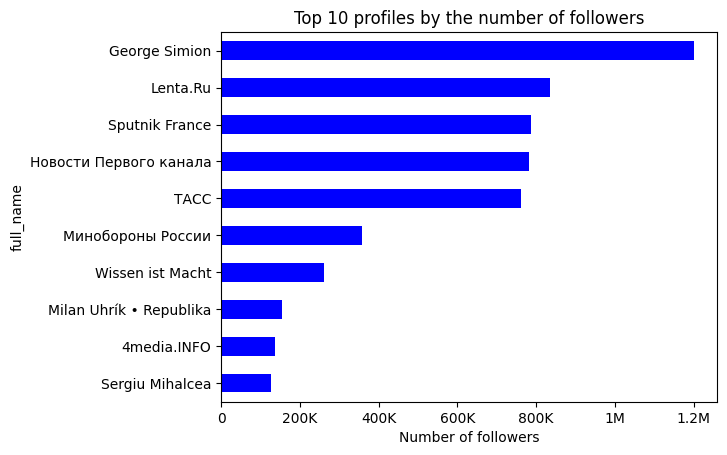

In [13]:
full_data.groupby('full_name')['followers_count'].mean().sort_values().tail(10).plot(kind='barh', color='blue')
plt.xlabel('Number of followers')
plt.title('Top 10 profiles by the number of followers')
plt.xticks(ticks=[0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6, 1.2e6],
           labels=['0', '200K', '400K', '600K', '800K', '1M', '1.2M'])
plt.show()

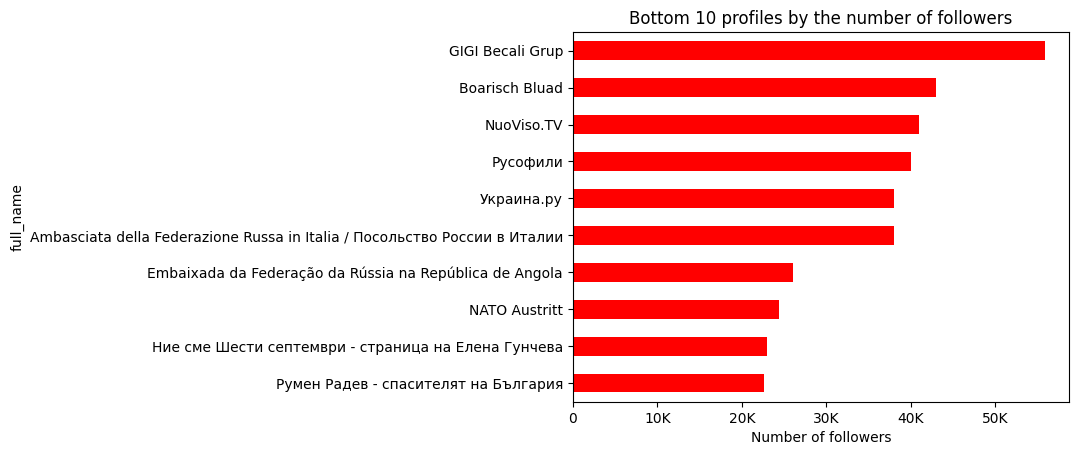

In [14]:
full_data.groupby('full_name')['followers_count'].mean().sort_values().head(10).plot(kind='barh', color='red')
plt.xlabel('Number of followers')
plt.title('Bottom 10 profiles by the number of followers')
plt.xticks(ticks=[0, 1e4, 2e4, 3e4, 4e4, 5e4],
           labels=['0', '10K', '20K', '30K', '40K', '50K'])
plt.show()

Here we can see top 10 popular profiles by the number of followers. Only one profile, **George Simion**, has more than 1M followers while four of them have more than 500K. Others have less than 500K followers.

At the same time, the 'worst' profile, **Румен Радев**, has more than 20K followers which is not bad.

We can also count the total number of posts' comments for each profile.

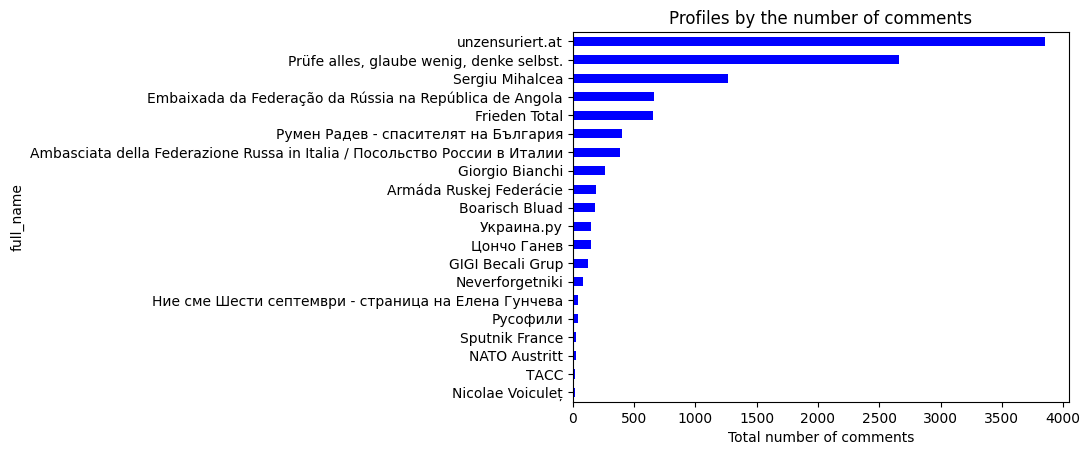

In [15]:
full_data.groupby('full_name')['comments_count'].sum().sort_values().tail(20).plot(kind='barh', color='blue')
plt.xlabel('Total number of comments')
plt.title('Profiles by the number of comments')
plt.show()

Here we can see that the 'most commented' profiles are in German language.

Finally, we can also create the 'aggregating' metrics of popularity like an average number of comments for one follower (with keeping in mind, if the profile is public, not only followers can comment).

In [16]:
comments_followers = full_data.groupby('full_name')[['comments_count', 'followers_count']].mean()
comments_followers['popularity'] = comments_followers['comments_count'] / comments_followers['followers_count']
comments_followers.sort_values('popularity', ascending=False).head(10)

,comments_count,followers_count,popularity
full_name,,,
unzensuriert.at,98.794872,58000.0,0.001703
"Prüfe alles, glaube wenig, denke selbst.",68.282051,74000.0,0.000923
Embaixada da Federação da Rússia na República de Angola,16.974359,26000.0,0.000653
Румен Радев - спасителят на България,10.256410,22600.0,0.000454
Frieden Total,16.820513,62416.0,0.000269
Ambasciata della Federazione Russa in Italia / Посольство России в Италии,9.846154,38000.0,0.000259
Sergiu Mihalcea,32.538462,126000.0,0.000258
Boarisch Bluad,4.666667,43000.0,0.000109
Украина.ру,3.846154,38000.0,0.000101


### 4.2 The dynamic of posts creation

Let's look at the `created_time` column and insights we can get from this.

In [17]:
full_data['created_time'].min(), full_data['created_time'].max()

(Timestamp('2022-12-01 11:56:58+0000', tz='UTC'),
 Timestamp('2023-04-24 14:34:06+0000', tz='UTC'))

The 'oldest' post in the dataset was created on December 01, 2022 and the latest was created on April 24, 2023. Now let's discover the dynamics of posts.

In [18]:
import datetime as dt
full_data['created_date'] = full_data['created_time'].dt.date

In [19]:
full_data['created_date'].describe()

count           1021
unique           103
top       2023-04-24
freq             236
Name: created_date, dtype: object

In [20]:
full_data.groupby('created_date')['text_original'].count().sort_values(ascending=False).head(10)

created_date
2023-04-24    236
2023-04-23    175
2023-04-22     69
2023-04-20     59
2023-04-21     55
2023-04-19     31
2023-04-18     24
2023-04-17     17
2023-04-06     13
2023-04-05     13
Name: text_original, dtype: int64

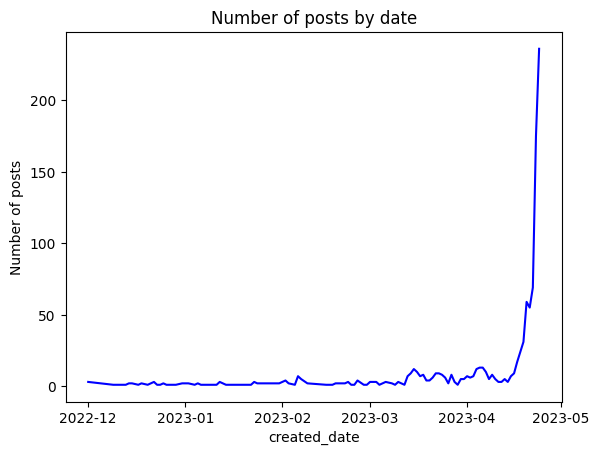

In [21]:
full_data.groupby('created_date')['text_original'].count().plot(kind='line', color='blue')
plt.title('Number of posts by date')
plt.ylabel('Number of posts')
plt.show()

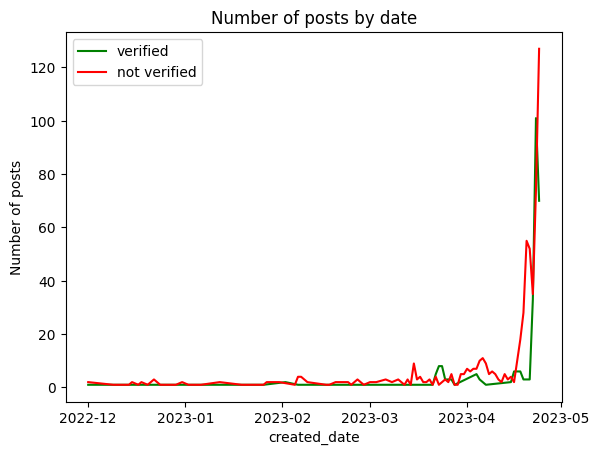

In [22]:
verified_data = full_data[full_data['is_verified']==True]
not_verified_data = full_data[full_data['is_verified']==False]

verified_data.groupby('created_date')['text_original'].count().plot(kind='line',
                                                                    color='green', label='verified')
not_verified_data.groupby('created_date')['text_original'].count().plot(kind='line',
                                                                        color='red', label='not verified')
plt.title('Number of posts by date')
plt.ylabel('Number of posts')
plt.legend()
plt.show()

The graph shows us the dynamics of posts creation. We can see a relatively low activity before the second decade of March 2023. Then it slightly increased and the largest jump in activity was observed starting from April 18, 2023 to April 24, 2023. The pattern is similar for verified and not verified profiles. **We can assume that some event was expected at the end of April, 2023 or has already happened on ~April 20-24, 2023.**

Moreover, let's look at the activity in terms of specific profiles. We will consider verified and not verified accounts separately.

In [23]:
full_data['is_verified'].value_counts()

False    625
True     282
Name: is_verified, dtype: int64

It seems that 282 posts were from verified profiles while 625 were posted by not verified ones.

In [24]:
verified = full_data[full_data['is_verified']==True]['full_name'].unique()
not_verified = full_data[full_data['is_verified']==False]['full_name'].unique()

len(verified), len(not_verified)

(10, 17)

10 profiles are verified while 17 are not.

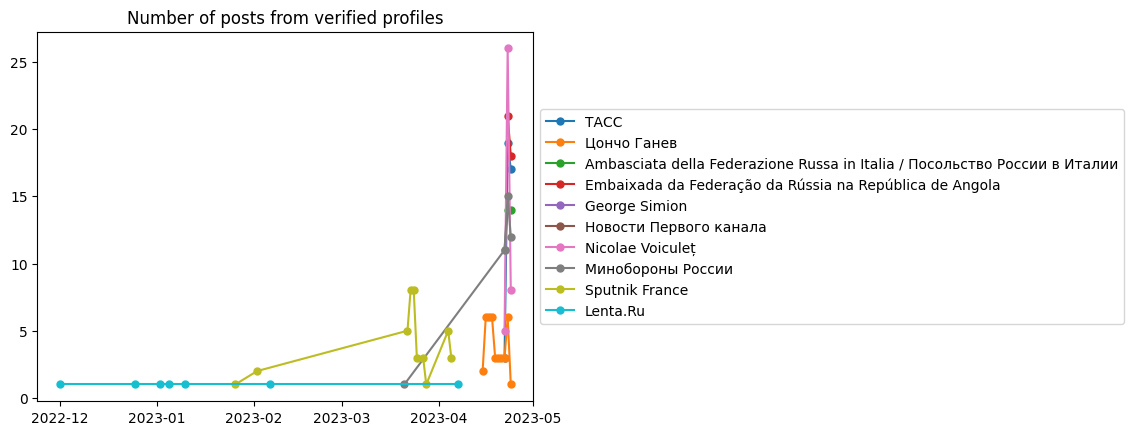

In [25]:
for account in verified:
  num_posts = full_data[full_data['full_name']==account].groupby('created_date')['text_original'].count()
  plt.plot(num_posts.index, num_posts.values, label=account, marker='.', markersize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Number of posts from verified profiles')
plt.show()

Here we can see **'unusual activity'** at the end of April 2023 for the following profiles: **ТАСС**, **Цончо Ганев**, **Ambasciata della Federazione Russa in Italia**, **Nicolae Voiculet**, **Минобороны России**, **Embaixada da Federacao da Russia na Republica de Angola**. It is clear that most of them are connected with Russia. Moreover, some of the accounts started posting only in March or April 2023. Maybe they were created at the same time with some purpose.

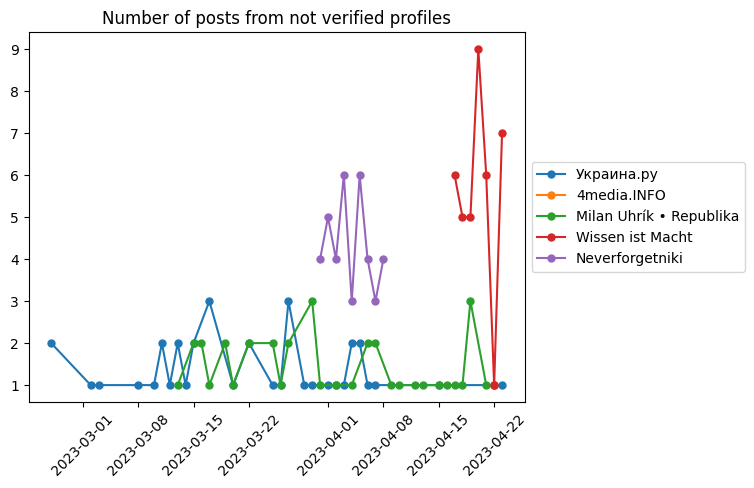

In [26]:
for account in not_verified[:5]:
  num_posts = full_data[full_data['full_name']==account].groupby('created_date')['text_original'].count()
  plt.plot(num_posts.index, num_posts.values, label=account, marker='.', markersize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Number of posts from not verified profiles')
plt.xticks(rotation=45)
plt.show()

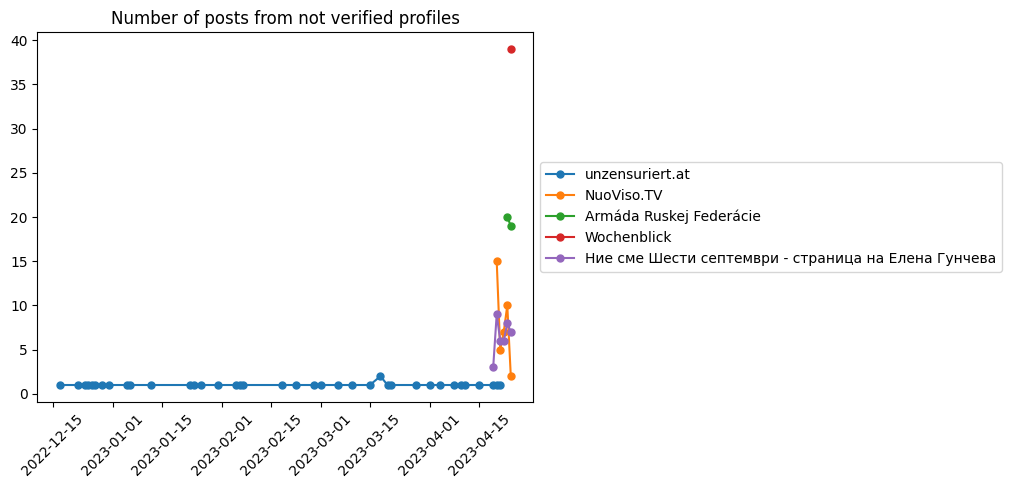

In [27]:
for account in not_verified[5:10]:
  num_posts = full_data[full_data['full_name']==account].groupby('created_date')['text_original'].count()
  plt.plot(num_posts.index, num_posts.values, label=account, marker='.', markersize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Number of posts from not verified profiles')
plt.xticks(rotation=45)
plt.show()

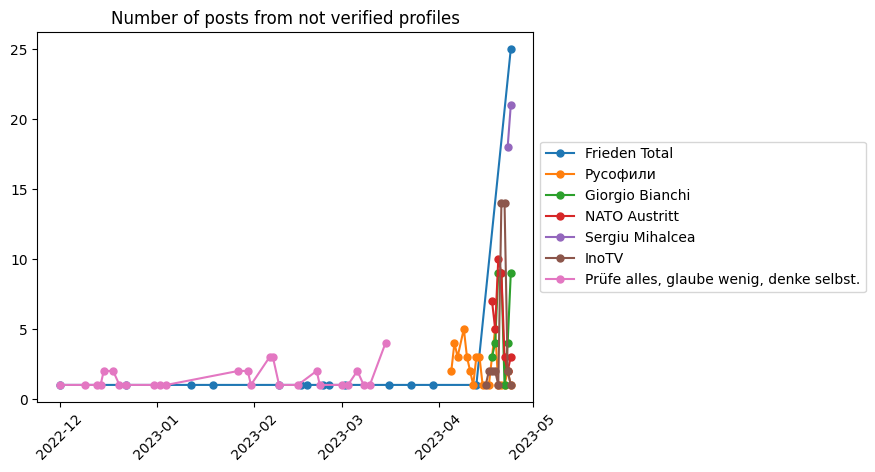

In [28]:
for account in not_verified[10:]:
  num_posts = full_data[full_data['full_name']==account].groupby('created_date')['text_original'].count()
  plt.plot(num_posts.index, num_posts.values, label=account, marker='.', markersize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Number of posts from not verified profiles')
plt.xticks(rotation=45)
plt.show()

The latter three graphs showed the same **'unusual activity'** for some other profiles. Probably, the more accurate conclusion we would have made if we dove deeper into posts content.

### 4.3 Whether the number of followers lead to more comments?

Let's now discover the relationship between the number of followers and the total number of comments.

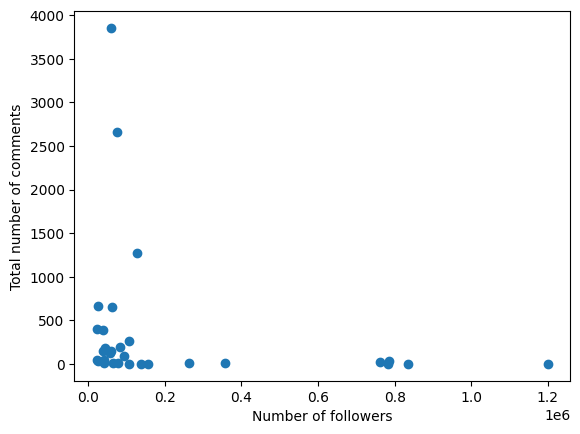

In [29]:
num_followers = full_data.groupby('full_name')['followers_count'].mean()
num_comments = full_data.groupby('full_name')['comments_count'].sum()
plt.scatter(num_followers, num_comments)
plt.xlabel('Number of followers')
plt.ylabel('Total number of comments')
plt.show()

Surpisingly, accounts with huge number of followers do not receive much comments on their posts.

Let's separate verified accounts from not verified.

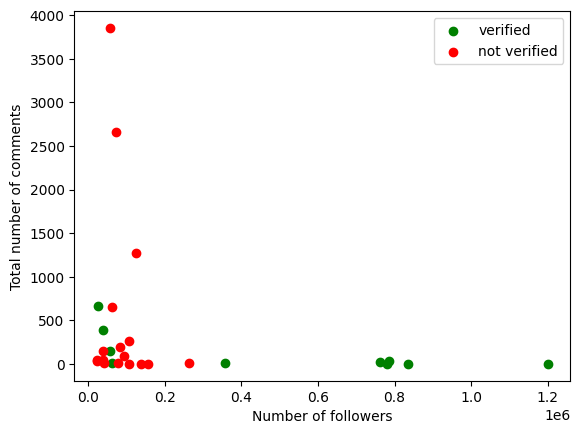

In [30]:
plt.scatter(num_followers[verified], num_comments[verified], color='green', label='verified')
plt.scatter(num_followers[not_verified], num_comments[not_verified], color='red', label='not verified')
plt.xlabel('Number of followers')
plt.ylabel('Total number of comments')
plt.legend()
plt.show()

The last graph clearly shows some patterns: **verified accounts have more followers while not verified ones have more comments on their posts**.

### 4.4 Comments dynamics

Finally, let's discover the dynamics of comments.

In [31]:
full_data[['full_name', 'created_date', 'text_original',
           'comments_count', 'followers_count']].sort_values('comments_count', ascending=False).head(10)

,full_name,created_date,text_original,comments_count,followers_count
post_id,,,,,
7.345627e+14,"Prüfe alles, glaube wenig, denke selbst.",2023-02-21,خطاب ينتظره العالم.. هل يغير بوتين مسار العملي...,447.0,74000
7.242118e+14,"Prüfe alles, glaube wenig, denke selbst.",2022-12-31,بوتين يوجه رسالة هامة للروس والعالم بحلول العا...,405.0,74000
8.230983e+14,Sergiu Mihalcea,2023-04-24,Avertizare de vuftuni violente și fenomene met...,341.0,126000
9.718566e+14,unzensuriert.at,2022-12-27,📌 Putin prohíbe el suministro de crudo ruso a ...,291.0,58000
9.214282e+14,unzensuriert.at,2023-03-18,"En 1938, el presidente Lázaro Cárdenas expidió...",190.0,58000
9.223675e+14,unzensuriert.at,2023-04-15,"El presidente ruso, Vladímir Putin, ha llegado...",188.0,58000
9.459828e+14,unzensuriert.at,2022-12-31,❗️Llega el 2023 a todo el territorio ruso y a ...,186.0,58000
6.917774e+14,"Prüfe alles, glaube wenig, denke selbst.",2022-12-22,المؤتمر الصحفي للرئيس الروسي فلاديمير بوتين,173.0,74000
9.449302e+14,unzensuriert.at,2022-12-22,✔️Embajador ruso en EE.UU.: Washington y Kiev ...,156.0,58000


We see that top 10 posts by the number of comments were created **not at the same period of time**.

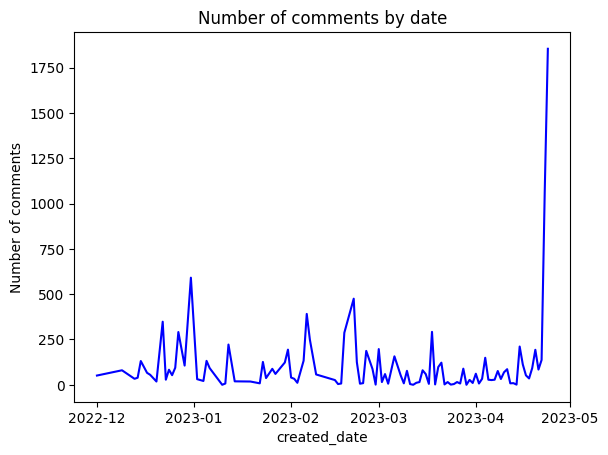

In [32]:
full_data.groupby('created_date')['comments_count'].sum().plot(kind='line', color='blue')
plt.title('Number of comments by date')
plt.ylabel('Number of comments')
plt.show()

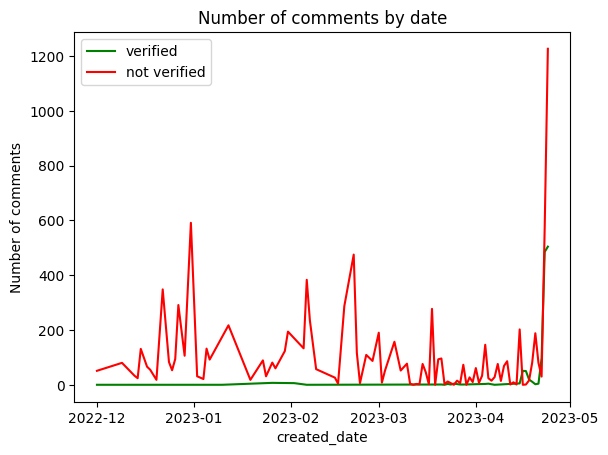

In [33]:
verified_data.groupby('created_date')['comments_count'].sum().plot(kind='line',
                                                                   color='green', label='verified')
not_verified_data.groupby('created_date')['comments_count'].sum().plot(kind='line',
                                                                       color='red', label='not verified')
plt.title('Number of comments by date')
plt.ylabel('Number of comments')
plt.legend()
plt.show()

Here we can observe **different behavior for verified and not verified profiles**. Verified profiles have a very low number of comments before April 2023. Not verified profiles have some 'spikes' in number of comments (e.g. in December 2022 and February 2023). But both verified and not verified accounts receive much more comments in April 2023.

## Conclusion

To summarize, we can draw the following conclusions:

- **The data is not complete.** The strangest point is that almost all profiles have 39 posts. But where are the other posts? Furthermore, we probably want to add some more information about the profiles, e.g. when was the profile created.

- We observed the **unusual activity (posts and comments) in the end of April 2023** which is more likely connected with some event (probably in Russia or Russia has been envolved).

- Verified and not verified accounts have slightly different comment patterns but similar posting patterns.

- Accounts which have more followers don't tend to receive more post comments.